In [1]:
import pandas as pd
import pareto
import os
import sys
from itertools import chain
from matplotlib import pyplot as plt
sys.path.append('..')

In [2]:
import rbf_functions

In [3]:
rbfs = [rbf_functions.squared_exponential_rbf,
        rbf_functions.original_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

pareto_sets = {}
for entry in rbfs:
    sollist = []
    solutions = []
    name = entry.__name__
    output_dir = f"../output/{name}/"
    for filename in os.listdir(output_dir):
        if filename.endswith('solution.csv'):
            sollist.append(filename[:-4])
            df_temp = pd.read_csv(f"{output_dir}{filename}", header=0)
            solutions.append(df_temp.values.tolist())
    pareto_sets[name] = list(chain.from_iterable(solutions))

pareto_sets.keys()
for rbf in pareto_sets:
    print(rbf, len(pareto_sets[rbf]))
# print(f"Loaded into list 'solutions': {', '.join(sollist)}")

squared_exponential_rbf 8227
original_rbf 9273
inverse_quadratic_rbf 5385
inverse_multiquadric_rbf 6296
exponential_rbf 4056
matern32_rbf 6266
matern52_rbf 4482


In [4]:
reference_sets = {}
for rbf in pareto_sets:
    print(rbf, len(pareto_sets[rbf]))
    nondominated = pareto.eps_sort([pareto_sets[rbf]], [0,1,2,3,4,5], [0.5, 0.05, 0.05, 0.05, 0.001, 0.05], maximize=[0,1,2,3,5])
    reference_sets[rbf] = nondominated
    df_nondom = pd.DataFrame(nondominated, columns=['hydropower', 'atomicpowerplant', 'baltimore', 'chester', 'environment', 'recreation'])
    print(rbf, len(df_nondom))
    df_nondom.to_csv(f"../notebooks/refsets/{rbf}_refset.csv", index=False, header=True)

squared_exponential_rbf 8227
squared_exponential_rbf 1357
original_rbf 9273
original_rbf 1514
inverse_quadratic_rbf 5385
inverse_quadratic_rbf 1266
inverse_multiquadric_rbf 6296
inverse_multiquadric_rbf 1157
exponential_rbf 4056
exponential_rbf 946
matern32_rbf 6266
matern32_rbf 1294
matern52_rbf 4482
matern52_rbf 857


In [14]:
for entry in rbfs:
    name = entry.__name__

    df_ref = pd.read_csv(f"../refsets/{name}_refset.csv")
    #zip solutions + vars
    df_sol = pd.DataFrame(columns=['hydropower', 'atomicpowerplant', 'baltimore', 'chester', 'environment',
           'recreation'])
    df_var = pd.DataFrame(columns=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
                 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
    #compare to ref set
    output_dir = f"../output/{name}"
    for filename in os.listdir(output_dir):
        if filename.startswith(filename[:3]):
            #load 
            if filename.endswith('solution.csv'):
                df_ts = pd.read_csv(f"{output_dir}/{filename}", header=0)
                df_sol = df_sol.append(df_ts, ignore_index=True)
            if filename.endswith('variables.csv'):
                df_tv = pd.read_csv(f"{output_dir}/{filename}", header=None)
                df_var = df_var.append(df_tv, ignore_index=True)
    #print(f"{len(df_var)} {len(df_sol)}")
    #match with selected solutions from refset, turn into var.csv
    sol = df_sol.values.tolist()
    var = df_var.values.tolist()
    ref = df_ref.values.tolist()
    refvar = []
    for idx, value in enumerate(sol):
        if sol[idx] in ref:
#             refvar.append((var[idx], sol[idx]))
            refvar.append(var[idx])
    df_refvar = pd.DataFrame(refvar)
    print(f"{name}: {len(df_refvar)}")
    df_refvar.to_csv(f"../notebooks/refsets/{name}_refset_variables.csv", index=False, header=False)
    

squared_exponential_rbf: 1357
original_rbf: 1514
inverse_quadratic_rbf: 1262
inverse_multiquadric_rbf: 1147
exponential_rbf: 945
matern32_rbf: 1294
matern52_rbf: 857


In [120]:
# df_var = pd.DataFrame(columns=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
#             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
df_sol = pd.DataFrame(columns=['hydropower', 'atomicpowerplant', 'baltimore', 'chester', 'environment',
       'recreation'])
for filename in os.listdir(output_dir):
    if filename.endswith('solution.csv'):
        print(output_dir+"/"+filename)
        df_t = pd.read_csv(f"{output_dir}/{filename}", header=0)
        df_sol = df_sol.append(df_t, ignore_index=True)
df_sol.drop_duplicates()

../output/exponential_rbf/100_solution.csv
../output/exponential_rbf/10_solution.csv
../output/exponential_rbf/20_solution.csv
../output/exponential_rbf/30_solution.csv
../output/exponential_rbf/40_solution.csv
../output/exponential_rbf/50_solution.csv
../output/exponential_rbf/60_solution.csv
../output/exponential_rbf/70_solution.csv
../output/exponential_rbf/80_solution.csv
../output/exponential_rbf/90_solution.csv


,hydropower,atomicpowerplant,baltimore,chester,environment,recreation
0,49.381320,0.611575,0.295920,0.432453,0.075958,1.0
1,63.041573,0.722849,0.543448,0.554598,0.078155,1.0
2,66.707734,0.718355,0.493048,0.594330,0.079874,1.0
3,64.545210,0.721776,0.551933,0.559509,0.080745,1.0
4,67.286465,0.704340,0.482022,0.523418,0.079391,1.0
...,...,...,...,...,...,...
4051,31.875394,0.387697,0.329944,0.406002,0.072129,1.0
4052,30.060716,0.124751,0.354029,0.357620,0.074207,1.0
4053,65.894837,0.736970,0.339360,0.602743,0.076154,1.0
4054,69.082329,0.510394,0.355382,0.553807,0.086166,1.0


In [22]:
x = 0
for rbf in pareto_sets:
    x += len(pareto_sets[rbf])
    print(rbf, len(pareto_sets[rbf]))
print("total:", x)
    
pareto_set = {}
sollist = []
solutions = []
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    for filename in os.listdir(output_dir):
        if filename.endswith('solution.csv'):
            sollist.append(filename[:-4])
            df_temp = pd.read_csv(f"{output_dir}{filename}", header=0)
            solutions.append(df_temp.values.tolist())
pareto_set = list(chain.from_iterable(solutions))
len(pareto_set)

squared_exponential_rbf 8227
original_rbf 9273
inverse_quadratic_rbf 5385
inverse_multiquadric_rbf 6296
exponential_rbf 4056
matern32_rbf 6266
matern52_rbf 4482
total: 43985


43985

In [25]:
print(len(pareto_set))
nondominated = pareto.eps_sort([pareto_set], [0,1,2,3,4,5], [0.5, 0.05, 0.05, 0.05, 0.001, 0.05], maximize=[0,1,2,3,5])
df_nondom = pd.DataFrame(nondominated, columns=['hydropower', 'atomicpowerplant', 'baltimore', 'chester', 'environment', 'recreation'])
print(len(nondominated))
df_nondom.to_csv(f"../notebooks/nboutput/all_rbf_refset.csv", index=False, header=True)

43985
1726


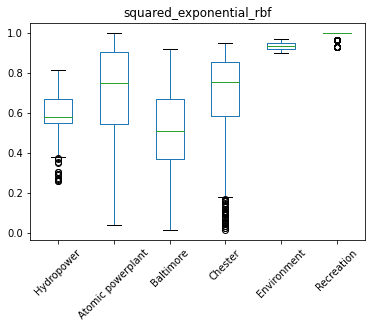

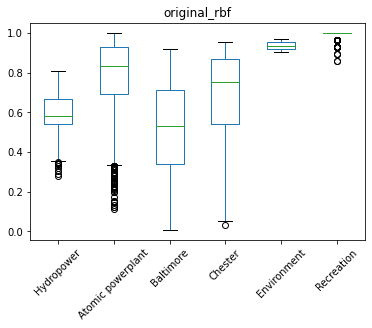

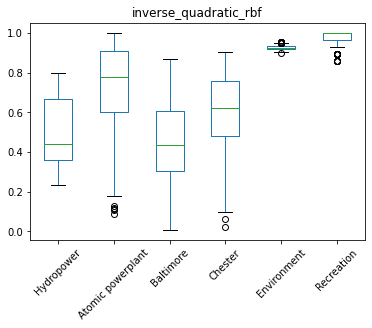

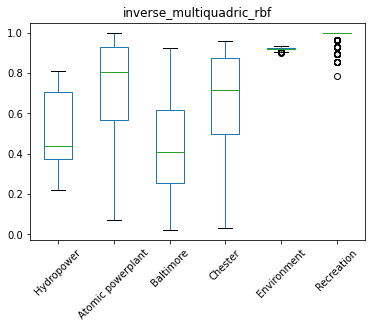

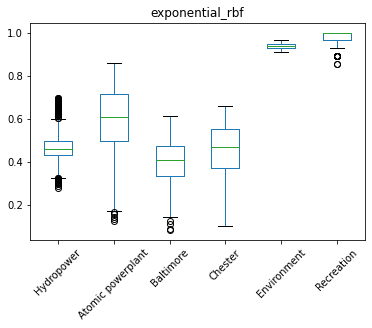

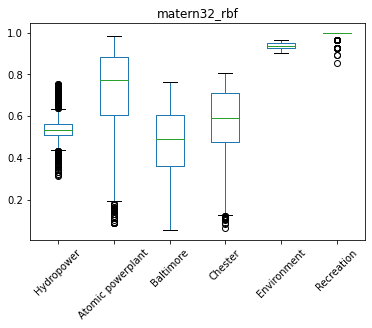

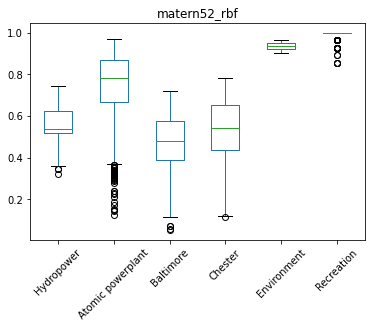

In [17]:
for rbf in reference_sets:
    df_nondom = pd.DataFrame(reference_sets[rbf], columns=['Hydropower', 'Atomic powerplant', 'Baltimore', 'Chester', 'Environment', 'Recreation'])
    df_nondom.iloc[:, 0] = df_nondom.iloc[:, 0] / 100
    df_nondom.iloc[:, 4] = 1 - df_nondom.iloc[:, 4]
    df_nondom.plot.box(rot=45)
    plt.title(rbf)
